In [1]:
# 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image

import pandas as pd
import numpy as np
import os
import string
import sys
import re
import datetime as dt
# now = dt.datetime.now().strftime('%y%m%d_%H%M%S')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 진행 여부 함수
def yes_or_no(question):
    while "the answer is invalid":
        reply = str(input(question+' (y/n): ')).lower().strip()
        if reply[0] == 'y':
            return True
        if reply[0] == 'n':
            return False
        else:
            print("실패: 'y' 혹은 'n' 를 입력해 주세요")

In [2]:
# 파일 불러오기
sheet_name = "컬럼분석"
input_path = os.path.join(os.getcwd(), "data\\")
output_path = os.path.join(os.getcwd(), "data\\out\\")
data = pd.read_excel(input_path+"기상자료개방포털 컬럼 조사.xlsx", sheet_name=sheet_name, header=0)

# # null 제거
# for i in range(len(input_test.columns)):
#     input_test[input_test.columns[i]] = input_test[input_test.columns[i]].fillna("")
# print(input_test.shape)
# input_test.head(5)

### 분류 리스트(사전) 생성

In [3]:
# 대분류 리스트
lar_catgr = data['대분류'].drop_duplicates().reset_index()['대분류']
# 중분류 리스트
mid_catgr = data['중분류'].drop_duplicates().reset_index()['중분류']
# 소분류 리스트
sml_catgr = data['소분류'].drop_duplicates().reset_index()['소분류']
# 전체 분류 리스트(사전)
tmp = data['소분류'].drop_duplicates().reset_index()
tmp_list = tmp['index'].to_list()
total_catgr = data.loc[tmp_list,['대분류','중분류','소분류']]
total_catgr

,대분류,중분류,소분류
0,기상관측,지상,종관기상관측(ASOS)
37,기상관측,지상,방재기상관측(AWS)
54,기상관측,지상,농업기상관측(AAOS)
83,기상관측,지상,북한기상관측
100,기상관측,지상,공공기관 기상관측
253,기상관측,지상,계절관측
280,기상관측,지상,황사관측
314,기상관측,지상,낙뢰관측
320,기상관측,해양,해양기상부이
348,기상관측,해양,등표기상관측


# 함수 & 옵션 관리

In [4]:
# dict 변환 함수
def cnv_dict(input):
    noun = input.iloc[:,0].to_list()
    cnt = input.iloc[:,1].to_list()
    globals()["cloud_dict"] = dict(zip(noun,cnt))
    print('cnv_dict:success - cloud_dict')
    
# 워드 클라우드 사이즈
okt = Okt()
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)

# 워드클라우드 생성
def w_cloud(val, expln):
    gen = wc.generate_from_frequencies(val)
    plt.figure()
    plt.imshow(gen)
    print(expln.head())
    print(expln.shape)
    
# 데이터 복사하기
def data_copy(data):
    globals()["copied"] = data.copy()
    print("copied")

### 모델 A (자료제공컬럼 - 전체/대분류별 통계)
#### 1. 모델 A-1(자료제공컬럼 - 전체)

In [37]:
# 모델 A: 제공자료컬럼만 그룹바이
data_A = data.groupby(['대분류', '중분류', '소분류', '제공자료컬럼']).head()

# 제공자료컬럼 카운팅
data_A_1 = pd.DataFrame(data_A.groupby('제공자료컬럼')['INDEX'].count()).reset_index().sort_values('INDEX', ascending=False)
data_A_1.columns = ['제공자료컬럼', 'count']
data_A_1.to_excel(output_path + "model_A.xlsx")

print(data_A.shape)
data_A.head()

(703, 17)


,INDEX,대분류,중분류,소분류,제공자료컬럼,예시,체크박스항목1,체크박스항목예시1,체크박스항목1Depth,체크박스항목2,체크박스항목예시2,체크박스항목2Depth,체크박스항목3,체크박스항목예시3,체크박스항목3Depth,추가,특이사항
0,1,기상관측,지상,종관기상관측(ASOS),지점,속초(90),지점,강원도,+1,관측,지면.초상온도,+1,NaN,NaN,NaN,NaN,NaN
1,1,기상관측,지상,종관기상관측(ASOS),시간,2022-11-01 01:00:00,지점,경기도,+1,관측,현상번호,+1,NaN,NaN,NaN,NaN,NaN
2,1,기상관측,지상,종관기상관측(ASOS),기온(°C),10.4,지점,경상남도,+1,관측,기온,+1,NaN,NaN,NaN,NaN,NaN
3,1,기상관측,지상,종관기상관측(ASOS),기온 QC플래그,NaN,지점,경상북도,+1,관측,강수,+1,NaN,NaN,NaN,NaN,NaN
4,1,기상관측,지상,종관기상관측(ASOS),강수량(mm),NaN,지점,광주광역시,+1,관측,바람,+1,NaN,NaN,NaN,NaN,NaN


In [33]:
data_A_1

,제공자료컬럼,count
155,번호,28
342,지점,24
189,시간,22
104,구분,17
122,날짜,10
341,지역,10
428,풍속(m/s),8
389,파일사이즈(GB),8
127,년,7
301,자료종류,7


In [6]:
# dict 변환
cnv_dict(data_A_1)

cnv_dict:success - cloud_dict


===== 제공자료컬럼 - 전체 카운팅 =====
    제공자료컬럼  count
155     번호     28
342     지점     24
189     시간     22
104     구분     17
122     날짜     10
(448, 2)


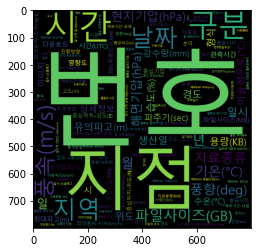

In [7]:
# 모델 A-1 분석 결과
print('===== 제공자료컬럼 - 전체 카운팅 =====')
w_cloud(cloud_dict, data_A_1)

copied
    제공자료컬럼  count
155     번호     28
342     지점     24
189     시간     22
104     구분     17
122     날짜     10
(448, 2)


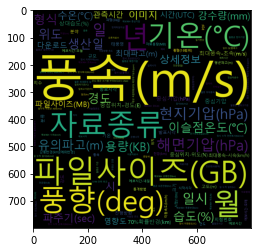

In [8]:
# dict 복사
data_copy(cloud_dict)

# 제거 옵션
copied.pop('지점')
copied.pop('번호')
copied.pop('시간')
copied.pop('구분')
copied.pop('지역')
copied.pop('날짜')
w_cloud(copied, data_A_1)

#### 2. 모델 A-2(자료제공컬럼 - 대분류별 통계)

In [9]:
# 각 데이터셋 분류
# 한 엑셀 파일에 저장
writer=pd.ExcelWriter(output_path + "model_a_2.xlsx", engine='openpyxl')
for i,j in zip(lar_catgr,range(len(lar_catgr))):
    globals()["data_lar_A_{}".format(j)] = data_A['대분류'] == i
    globals()["data_lar_A_{}".format(j)] = data_A[globals()["data_lar_A_{}".format(j)]==True]
    globals()["data_lar_A_{}".format(j)].to_excel(writer, sheet_name=i)
writer.save()
print(data_lar_A_0.shape)
data_lar_A_0.head()

(319, 17)


,INDEX,대분류,중분류,소분류,제공자료컬럼,예시,체크박스항목1,체크박스항목예시1,체크박스항목1Depth,체크박스항목2,체크박스항목예시2,체크박스항목2Depth,체크박스항목3,체크박스항목예시3,체크박스항목3Depth,추가,특이사항
0,1,기상관측,지상,종관기상관측(ASOS),지점,속초(90),지점,강원도,+1,관측,지면.초상온도,+1,NaN,NaN,NaN,NaN,NaN
1,1,기상관측,지상,종관기상관측(ASOS),시간,2022-11-01 01:00:00,지점,경기도,+1,관측,현상번호,+1,NaN,NaN,NaN,NaN,NaN
2,1,기상관측,지상,종관기상관측(ASOS),기온(°C),10.4,지점,경상남도,+1,관측,기온,+1,NaN,NaN,NaN,NaN,NaN
3,1,기상관측,지상,종관기상관측(ASOS),기온 QC플래그,NaN,지점,경상북도,+1,관측,강수,+1,NaN,NaN,NaN,NaN,NaN
4,1,기상관측,지상,종관기상관측(ASOS),강수량(mm),NaN,지점,광주광역시,+1,관측,바람,+1,NaN,NaN,NaN,NaN,NaN


In [10]:
# 카운트점검
for i,j in zip(range(len(lar_catgr)),lar_catgr):
    print(str(j) + ": " + str(globals()["data_lar_A_{}".format(i)].shape))

기상관측: (319, 17)
기상위성: (11, 17)
레이더: (8, 17)
기상예보: (75, 17)
수치모델: (54, 17)
기후: (112, 17)
응용기상: (18, 17)
지진화산: (12, 17)
날씨이슈별데이터: (20, 17)
역사기후: (39, 17)
메타데이터: (12, 17)
품질정보: (23, 17)


In [11]:
data_A.groupby(['대분류', '중분류', '소분류', '제공자료컬럼']).head().shape

(703, 17)

In [12]:
pd.DataFrame(data_A.groupby('제공자료컬럼')['INDEX'].count()).reset_index().sort_values('INDEX', ascending=False)

,제공자료컬럼,INDEX
155,번호,28
342,지점,24
189,시간,22
104,구분,17
122,날짜,10
341,지역,10
428,풍속(m/s),8
389,파일사이즈(GB),8
127,년,7
301,자료종류,7


In [26]:
#제공자료컬럼 널 삭제
# 한 엑셀 파일에 저장
writer=pd.ExcelWriter(output_path + "data_lar_A_2_groupby.xlsx", engine='openpyxl')

for i,j in zip(range(len(lar_catgr)), lar_catgr):
    # 대분류마다 변수 지정
    globals()["data_A_{}".format(i)] = data_A.loc[data_A['대분류'] == j]
    
    # 분류된 데이터마다 그룹바이
    globals()["data_lar_A_{}".format(i)] = pd.DataFrame(
        globals()["data_A_{}".format(i)].groupby(
            '제공자료컬럼')['INDEX'].count()).reset_index().sort_values('INDEX', ascending=False)
    
    # 컬럼 정리
    globals()["data_lar_A_{}".format(i)].columns = ['제공자료컬럼', 'count']
    globals()["data_lar_A_{}".format(i)].to_excel(writer, sheet_name=j)

   
    
writer.save()

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 기상관측 =====
        제공자료컬럼  count
204         지점     15
104         시간     11
228    풍속(m/s)      7
75      기온(°C)      7
237  해면기압(hPa)      6
(243, 2)


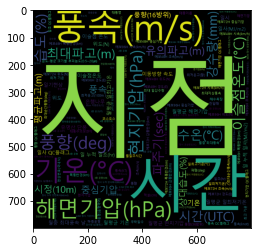

In [14]:
cnv_dict(data_lar_A_0)
print("===== 제공자료컬럼 - " + lar_catgr[0] + " =====")
w_cloud(cloud_dict, data_lar_A_0)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 기상위성 =====
      제공자료컬럼  count
9  파일사이즈(GB)      2
0       관측시간      1
1  관측시간(UTC)      1
2        관측일      1
3         구분      1
(10, 2)


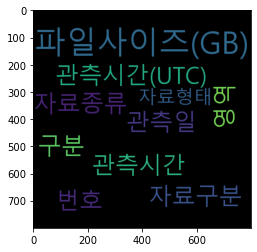

In [15]:
cnv_dict(data_lar_A_1)
print("===== 제공자료컬럼 - " + lar_catgr[1] + " =====")
w_cloud(cloud_dict, data_lar_A_1)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 레이더 =====
      제공자료컬럼  count
0       관측시간      2
1         구분      2
2         번호      2
3  파일사이즈(MB)      2
(4, 2)


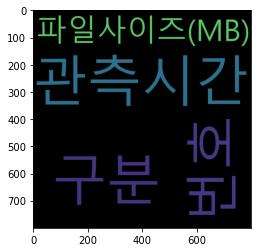

In [16]:
cnv_dict(data_lar_A_2)
print("===== 제공자료컬럼 - " + lar_catgr[2] + " =====")
w_cloud(cloud_dict, data_lar_A_2)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 기상예보 =====
   제공자료컬럼  count
34     일시      4
39     지역      4
17     날짜      3
16     구분      3
28    영향도      3
(47, 2)


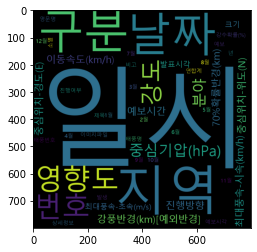

In [17]:
cnv_dict(data_lar_A_3)
print("===== 제공자료컬럼 - " + lar_catgr[3] + " =====")
w_cloud(cloud_dict, data_lar_A_3)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 수치모델 =====
       제공자료컬럼  count
3          번호     11
0          구분      7
1          날짜      7
10  파일사이즈(GB)      6
2           년      4
(16, 2)


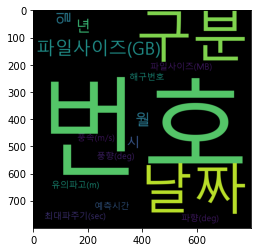

In [18]:
cnv_dict(data_lar_A_4)
print("===== 제공자료컬럼 - " + lar_catgr[4] + " =====")
w_cloud(cloud_dict, data_lar_A_4)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 기후 =====
   제공자료컬럼  count
46     지점      9
32     시간      9
43   종료시각      2
33   시작시각      2
0    SPI1      1
(94, 2)


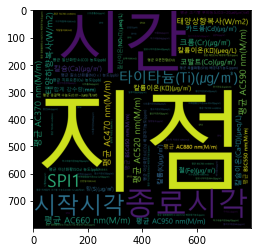

In [19]:
cnv_dict(data_lar_A_5)
print("===== 제공자료컬럼 - " + lar_catgr[5] + " =====")
w_cloud(cloud_dict, data_lar_A_5)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 응용기상 =====
    제공자료컬럼  count
2     다운로드      2
3       번호      2
4  예보시간-내일      2
5  예보시간-모레      2
6  예보시간-오늘      2
(10, 2)


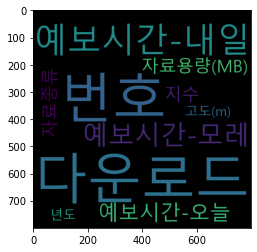

In [20]:
cnv_dict(data_lar_A_6)
print("===== 제공자료컬럼 - " + lar_catgr[6] + " =====")
w_cloud(cloud_dict, data_lar_A_6)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 지진화산 =====
  제공자료컬럼  count
0     경도      2
1     규모      2
2     시간      2
3     위도      2
4     위치      2
(6, 2)


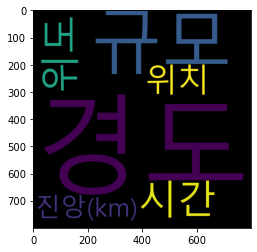

In [21]:
cnv_dict(data_lar_A_7)
print("===== 제공자료컬럼 - " + lar_catgr[7] + " =====")
w_cloud(cloud_dict, data_lar_A_7)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 날씨이슈별데이터 =====
   제공자료컬럼  count
0      구분      4
1      번호      4
2     생산일      4
3  용량(KB)      4
4      형식      4
(5, 2)


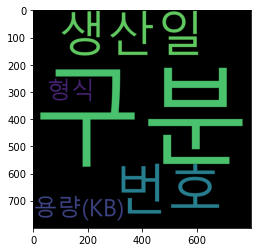

In [22]:
cnv_dict(data_lar_A_8)
print("===== 제공자료컬럼 - " + lar_catgr[8] + " =====")
w_cloud(cloud_dict, data_lar_A_8)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 역사기후 =====
   제공자료컬럼  count
18     지역      6
6      번호      5
16   자료종류      4
0     PDF      2
12     연도      2
(20, 2)


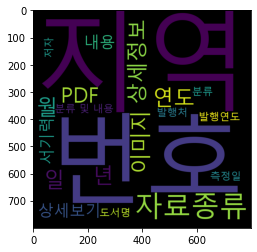

In [23]:
cnv_dict(data_lar_A_9)
print("===== 제공자료컬럼 - " + lar_catgr[9] + " =====")
w_cloud(cloud_dict, data_lar_A_9)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 메타데이터 =====
  제공자료컬럼  count
9   통계방법      2
0     경도      1
1   관측요소      1
2     단위      1
3     위도      1
(11, 2)


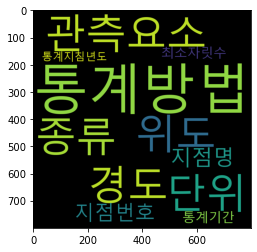

In [24]:
cnv_dict(data_lar_A_10)
print("===== 제공자료컬럼 - " + lar_catgr[10] + " =====")
w_cloud(cloud_dict, data_lar_A_10)

cnv_dict:success - cloud_dict
===== 제공자료컬럼 - 품질정보 =====
      제공자료컬럼  count
0   CDMS_MQC      1
12     연직일관성      1
21      지점번호      1
20       지속성      1
19    정역학일치성      1
(23, 2)


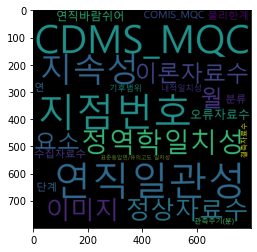

In [25]:
cnv_dict(data_lar_A_11)
print("===== 제공자료컬럼 - " + lar_catgr[11] + " =====")
w_cloud(cloud_dict, data_lar_A_11)

In [ ]:
data['대분류'].drop_duplicates().reset_index()['대분류']

In [ ]:
data['중분류'].drop_duplicates().reset_index()

In [ ]:
a = data['중분류'].drop_duplicates().reset_index()
aa = a['index'].to_list()
data.loc[aa,'대분류']

In [ ]:
data.loc[aa,'대분류']

In [ ]:
col_list = data.columns.to_list()

In [ ]:
col = col_list[6]
print(col)
data[col].str.split('-').map(lambda x : x)

In [ ]:
col = col_list[8]
print(col)
data[col].str.split('-').map(lambda x: x)

In [ ]:
# 컬럼 추리기
col = col_list[6]
print(col)
tmp = data.loc[data[col].notna(), col].reset_index()
tmp = tmp['체크박스항목1']
# data[col].str.split('-').map(lambda x: x)
tmp

In [ ]:
len(tmp)

In [ ]:
tmp.head(100)

In [ ]:
# '-' 포함한 단어들만 추리기
tmp_list = []
for i in range(len(tmp)):
    if re.findall('-', tmp[i]) == ['-']:
        tmp_list.append(i)

In [ ]:
tmp[35].split('-')

In [ ]:
tmp[tmp_list]

In [ ]:
tmp[0]

In [ ]:
tmp.isin('-')

In [ ]:
tmp.str.split('-').map(lambda x: x[0])

In [ ]:
os.getcwd()

# 워드 클라우드 ( 테스트)

In [ ]:
import jpype

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

In [ ]:
with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [ ]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='malgun', width=10000, height=10000, scale=2.0, max_font_size=2500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
# 엑셀 한 시트에 저장
# #1. 파일 생성
# writer=pd.ExcelWriter('테스트파일명.xlsx', engine='openpyxl')
 
# #2. 생성 파일에 시트명 지정 후 dataframe에 저장한 결과값 넣기
# df1.to_excel(writer, sheet_name='sheet1')
 
 
# # 3. 작성 완료 후 파일 저장
# writer.save()

In [ ]:
# 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jpype
from konlpy.tag import Okt # <- jpype 부터 불러와야 불러오기 가능
from PIL import Image
import numpy as np

with open(input_path + 'test1.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)